# APPRENTISSAGE SUPERVISÉ : LES 4 ÉTAPES - ML#2

### Vecteur target et matrice features

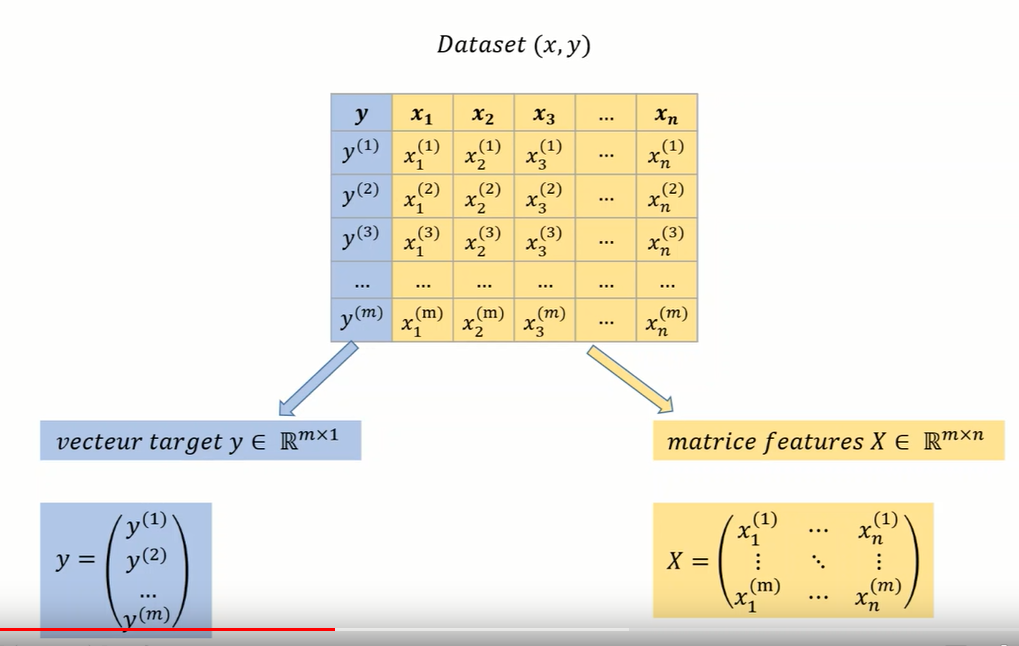

### Le modèle

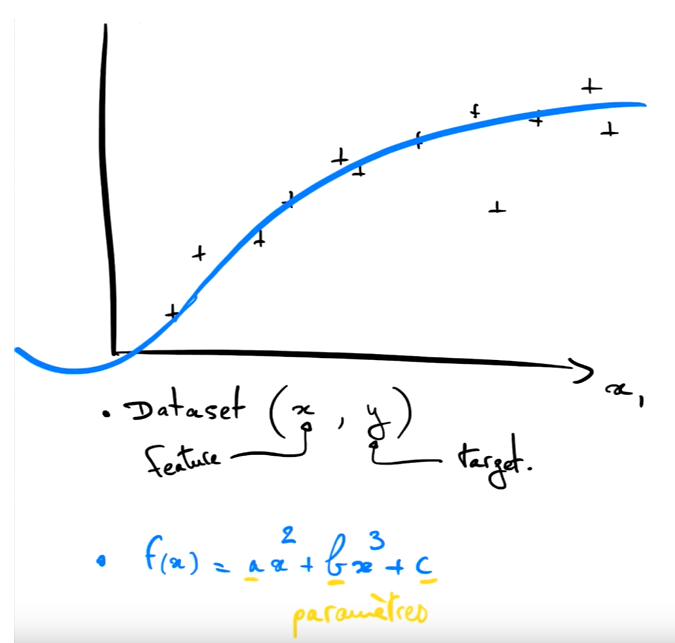

### La fonction coût

C'est la fonction qui décrit les erreurs du modèle, c'est à dire les différences entre le modèle et la réalité, la différence entre f(x) et y.

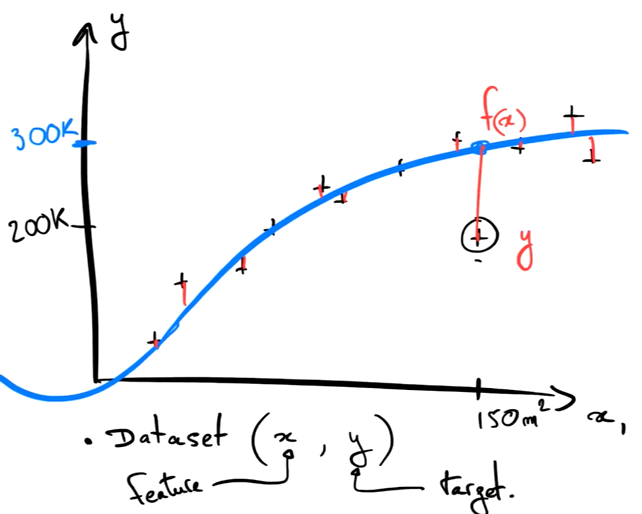

### Algorithme de minimisation de la fonction coût

C'est l'algorithme d'apprentissage qui va chercher à trouver les paramètres qui vont permettre de minimiser la fonction coût, c'est à dire minimiser les différences entre le modèle et la réalité.

Les algorithmes de minimisation les plus connus sont la méthode des moindres carrés et la descente de gradient.

**Pour rappel méthode des mondres carrés consiste à trouver le minimum de la fonction coût (polynome de second degré) c'est à dire à trouver le point ou sa dérivée s'annule (tangente horizontale par rapport à J).** Moins utilisé en ML car beaucoup plus gourmand en puissance de calcul à cause des transposés de matrice.

Pour la descente de gradient, au départ la machine va donner des paramètres aléatoires à son modèle puis va comparer son modèle et la réalité.
Elle s'arretera lorsqu'elle aura trouver le modèle qui décrit le mieux la réalité, lorsque les différences entre le modèle et la réalité seront les plus faible.

# LA RÉGRESSION LINÉAIRE (partie 1/2) - ML#3

Voici le modèle, la fonction coût et l'algorithme de minimisation d'une régression linéaire.

Modèle : f(x) = ax+b

Fonction coût : J(a,b) = 1/2m Somme (f(xi) - yi)²  --> c'est l'erreur quadratique moyenne

Algorithme de minimisation : Descente de gradient le plus souvent
                             
J(a,b)' = 0 --> Méthode des moindre carrés, on cherche les paramètres pour lesquels la dérivée de la fonction coût s'annule

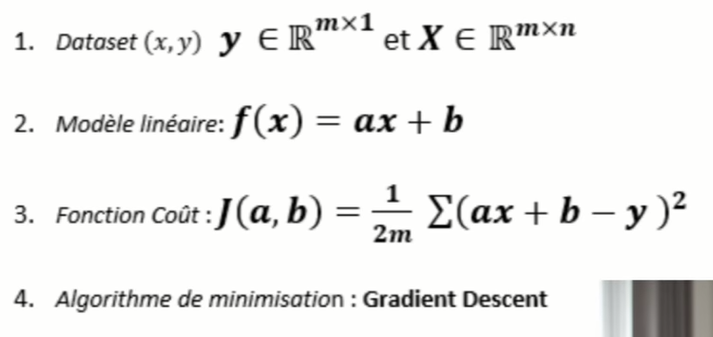

# DESCENTE DE GRADIENT (GRADIENT DESCENT) - ML#4

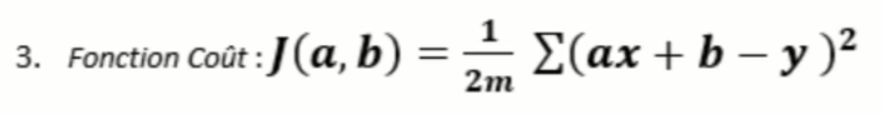

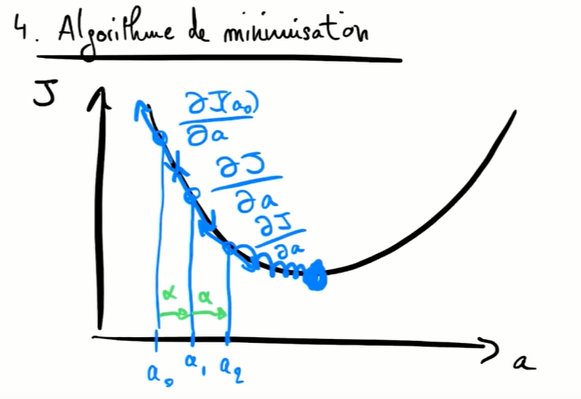

On calcule la dérivé de la fonction coût par rapport à a et à b.

L'algorithme va ensuite choisir une valeur de a et essayer par itération à minisimer la dérivé de la fonction coût jusqu'à atteindre le minimum.

La vitesse de convergence de l'algorithme, learning rate en anglais, va définir le saut que va faire la dérivé à chaque itération pour converger vers le minimum, cela va être la différence entre a(i) et a(i+1). C'est un hyperparamètre définit par alpha.

En réalité, la fonction coût dépend de 2 paramètres (a et b), elle ressemble donc plutôt à ceci.

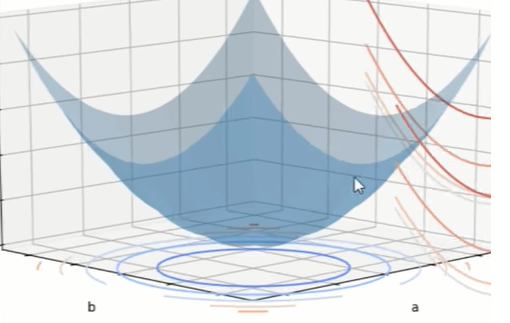

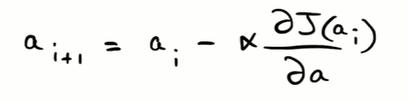

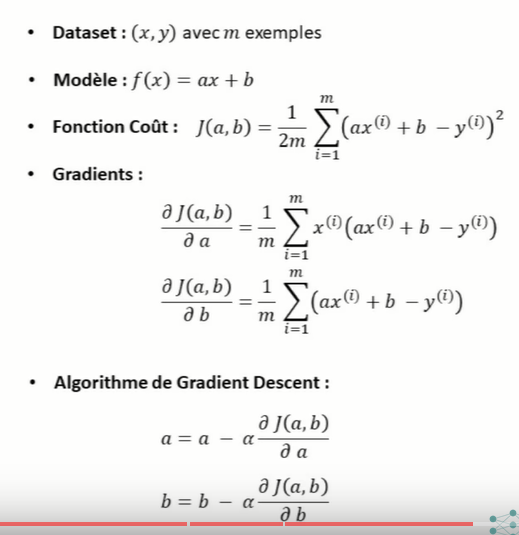

# RÉGRESSION LINÉAIRE (partie 2/2) - ML#6

On va voir comment écrire sous forme de matrice des équations ci dessus pour pouvoir les écrire en python.

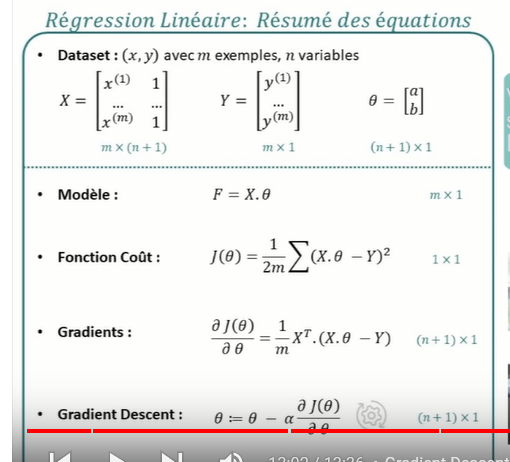

# RÉGRESSION LINÉAIRE NUMPY - ML#8

On écrire l'algorithme de la descente de gradient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

#### Création de 2 vecteurs x et y pour la régression

In [37]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)

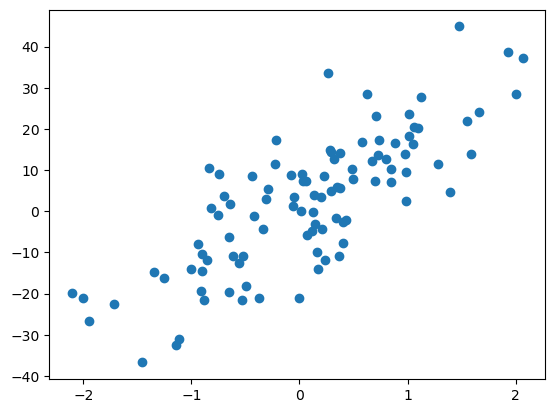

In [38]:
plt.scatter(x,y)

#### On redimensionne y

In [39]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


#### Création de la matrice X avec le vecteur x et la colonne de biais

In [40]:
one = np.ones((x.shape[0], 1))

In [41]:
X = np.concatenate((x, one), axis=1)

In [42]:
X.shape

(100, 2)

#### Initialisation de theta

In [43]:
theta = np.random.randn(2,1)

### Modèle

In [44]:
def model(X, theta):
    return X.dot(theta)

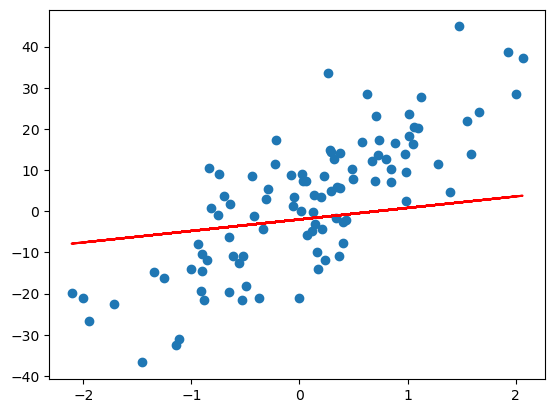

In [45]:
model(X, theta)
plt.plot(x, model(X, theta), c='r')
plt.scatter(x,y)

### Fonction coût

In [46]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((X.dot(theta) - y)**2)

In [47]:
cost_function(X, y, theta)

112.40309323043947

### Gradient et Descente de Gradient

In [48]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [49]:
grad(X, y, theta)

array([[-9.57132043],
       [-4.20489802]])

In [50]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [51]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.001, n_iterations=10000)

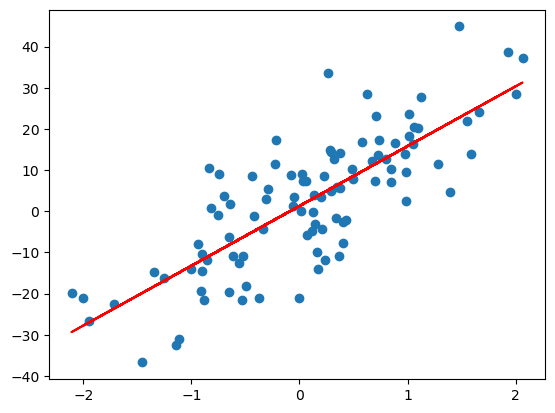

In [52]:
predictions = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

#### Courbe d'apprentissage 

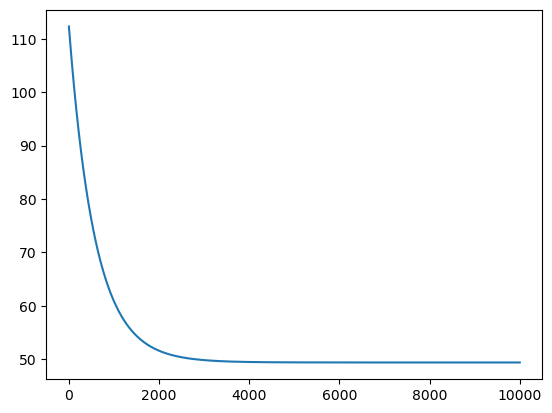

In [53]:
iterations = len(cost_history)

plt.plot(range(iterations), cost_history)

On voit qu'au bout de 200 itérations environ, la fonction coût est déja minimisée, les itérations suivantes améliorent peu le modèle.

#### Coefficient de dérermination R²

In [54]:
def R_squared (y, predictions):
    u = np.sum((y - predictions)**2)
    v = np.sum((y-y.mean())**2)
    return 1 - u/v

In [55]:
R_squared (y, predictions)

0.6270778167778364

## Régression polynomiale

f(x) = ax² + bx + c

In [62]:
x = np.linspace(0,10,100)
x = x.reshape(x.shape[0],1)

In [63]:
y = x**2 + 15*np.random.rand(100,1) + 15

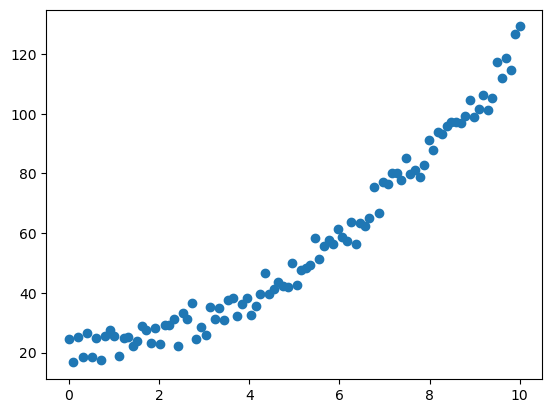

In [64]:
plt.scatter(x,y)

In [65]:
x2 = x**2

In [66]:
biais = np.ones((x.shape[0],1))

In [67]:
A = np.concatenate((x2, x), axis=1)

In [68]:
# création de la matrice X
X = np.concatenate((A, biais), axis=1)

In [69]:
# création de theta
theta = np.random.randn(3,1)

In [70]:
cost_function(X, y, theta)

12334.521219237458

In [71]:
grad(X, y, theta)

array([[-7051.27348855],
       [ -892.77580437],
       [ -124.98061324]])

In [75]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.0001, n_iterations=1000)

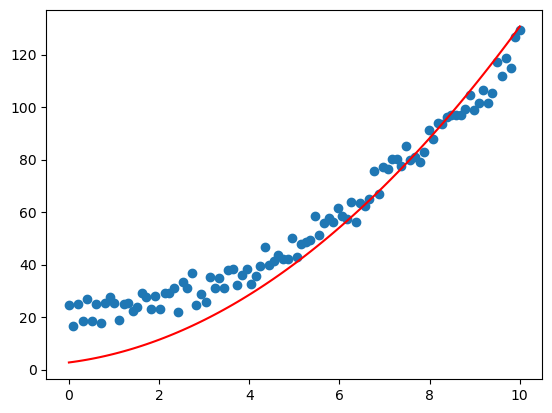

In [76]:
predictions = model(X, theta_final)

plt.scatter(x[:,0],y)
plt.plot(x[:,0], predictions, c='r')